In [2]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import re
%config InlineBackend.figure_format = 'svg'
def get_numbers_from_filename(filename):
    return re.search(r'\d+', filename).group(0)

directory = os.getcwd()

In [3]:
## Data read-in
hdf = h5py.File('XSec_Database_H2_Plasma.h5', 'r')

In [4]:
for key in hdf.keys():
    print(key)

H2-H2Ion1
H2-H3Ion1
H2-HIon1
H2-electron


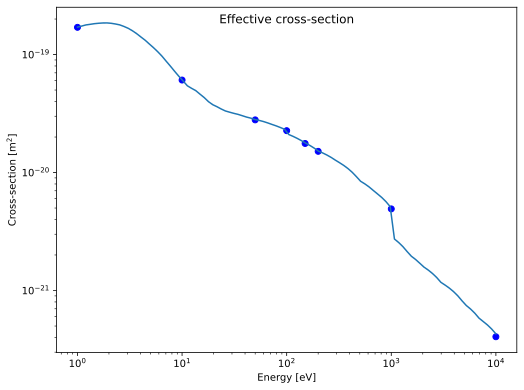

In [6]:
fig = plt.figure()
fig.suptitle('Effective cross-section')
axs = fig.add_axes([0,0,1,1])
axs.set(xlabel='Energy [eV]',ylabel='Cross-section [m$^2$]',xscale='log',yscale='log')
for filename in sorted(os.listdir(directory)):
    if filename.startswith("PartAnalyze"):
        velo = float(get_numbers_from_filename(filename))
        # Convert it an energy in eV
        energy = 0.5*9.11E-31*velo**2/1.602176634e-19
        # Get the rate [1/s] from the simulation result (column number starts by 0)
        df = pd.read_csv(filename, usecols=[6])
        # Calculate the cross-section from the rate (velocity, volume, and number density of background gas and electrons)
        xsec = df.tail(1).values/(velo*1e-16*1e22*1e21)
        axs.plot(energy,xsec,'bo')
x = np.logspace(0, 4, num=100)
y = np.empty([100])
data = hdf['H2-electron']
for idx, xval in enumerate(x):
    yval = np.interp(xval,data['ELASTIC'][:,0],data['ELASTIC'][:,1],left=0,right=0)
    y[idx] = yval
    for group in data.keys():
        if(group=='ELECTRONIC' or group=='REACTION' or group=='VIBRATION'):
            dset = data[group]
            for dset in dset.keys():
                yval = np.interp(xval,data[group][dset][:,0],data[group][dset][:,1],left=0,right=0)
                y[idx] += yval
    #print(xval,y[idx])
axs.plot(x,y)
fig.savefig('Figure_Verification.jpg', bbox_inches='tight')

In [7]:
hdf.close()